# Fire Cases in UK
## Project Number: 19


### project members:

> #### Stav Darvish

> #### Noga Atiya

> #### Yair Monzon

> #### Eliav Berniger

### Link:

> #### https://www.kaggle.com/datasets/timmofeyy/-fire-cases-in-uk-within-last-3-years

<img src= "https://raw.githubusercontent.com/Nogatiya/Data-Science/main/%D7%AA%D7%9E%D7%95%D7%A0%D7%AA%20%D7%A4%D7%AA%D7%99%D7%97%D7%94.jpg" width="650"/>

## About our data:

Our data describes any call that Fire Dept.control room in London had recived between the years 2019-2022. The data is sorted according to location, day, hour, and many other details about the case.
Our goal is to observe the data, with hope to improve the service, save money, and save people's lives.

## Preamble

Link to the article:
https://www.theguardian.com/uk-news/2019/dec/17/london-fire-brigade-one-of-the-worst-in-uk-inspectors-say

#### Little presentaition of our data 

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from datetime import date

In [71]:
url = "https://raw.githubusercontent.com/Nogatiya/Data-Science/main/fire_cases_in_uk_last_3_years.csv"
data_uk = pd.read_csv(url)
data_uk.head()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (ֲ£),NumCalls
0,000006-01012019,01-ינו-19,2019,00:01:45,0,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,333.0,2.0
1,000019-01012019,01-ינו-19,2019,00:04:33,0,Fire,Secondary Fire,NaN,Outdoor,Tree scrub,...,357.0,Edmonton,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
2,000020-01012019,01-ינו-19,2019,00:04:39,0,False Alarm,False alarm - Good intent,NaN,Outdoor,Domestic garden (vegetation not equipment),...,318.0,Southgate,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
3,000021-01012019,01-ינו-19,2019,00:04:44,0,False Alarm,AFA,NaN,Dwelling,Stately Home (part not open to public),...,210.0,Kensington,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
4,000024-01012019,01-ינו-19,2019,00:05:00,0,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,329.0,Bethnal Green,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0


In [72]:
data_uk.tail()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (ֲ£),NumCalls
331565,030044-28022022,28-פבר-22,2022,23:31:12,23,Special Service,Special Service,Effecting entry/exit,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,...,260.0,Heston,NaN,NaN,1.0,1.0,1.0,1.0,352.0,1.0
331566,030045-28022022,28-פבר-22,2022,23:40:48,23,Fire,Primary Fire,NaN,Outdoor Structure,Outdoor storage,...,349.0,Hornchurch,NaN,NaN,2.0,2.0,2.0,3.0,1056.0,1.0
331567,030046-28022022,28-פבר-22,2022,23:43:54,23,False Alarm,AFA,NaN,Non Residential,Leisure Centre,...,339.0,Battersea,NaN,NaN,1.0,1.0,1.0,1.0,352.0,1.0
331568,030047-28022022,28-פבר-22,2022,23:43:58,23,False Alarm,AFA,NaN,Other Residential,Hotel/motel,...,178.0,Dowgate,NaN,NaN,1.0,1.0,1.0,1.0,352.0,1.0
331569,030048-28022022,28-פבר-22,2022,23:44:02,23,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,390.0,Tottenham,NaN,NaN,1.0,1.0,1.0,1.0,352.0,1.0


In [73]:
data_uk.columns

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode', 'ProperCase',
       'IncGeo_WardCode', 'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m',
       'Northing_m', 'Easting_rounded', 'Northing_rounded', 'Latitude',
       'Longitude', 'IncidentStationGround',
       'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpHoursRoundUp', 'Notional Cost (ֲ£)', 'NumCalls'],
      dtype='object')

### Explaination of the data:

| Column      | Description |
|:----------- |:----------- |
| UPRN       | unique property reference number      |
| USRN       | unique street reference number       |

In [74]:
data_uk.isnull().sum().sort_values (ascending = False)

SpecialServiceType                        219000
SecondPumpArriving_DeployedFromStation    205590
SecondPumpArriving_AttendanceTime         205589
Northing_m                                180948
Latitude                                  180948
Longitude                                 180948
Postcode_full                             180948
Easting_m                                 180948
FirstPumpArriving_DeployedFromStation      19760
FirstPumpArriving_AttendanceTime           19755
NumStationsWithPumpsAttending               4213
NumPumpsAttending                           4213
PumpHoursRoundUp                            2208
Notional Cost (ֲ£)                          2208
PumpCount                                   2103
NumCalls                                       4
IncGeo_WardNameNew                             1
IncGeo_WardName                                1
IncGeo_WardCode                                1
DateOfCall                                     0
AddressQualifier    

In [75]:
data_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331570 entries, 0 to 331569
Data columns (total 37 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   IncidentNumber                          331570 non-null  object 
 1   DateOfCall                              331570 non-null  object 
 2   CalYear                                 331570 non-null  int64  
 3   TimeOfCall                              331570 non-null  object 
 4   HourOfCall                              331570 non-null  int64  
 5   IncidentGroup                           331570 non-null  object 
 6   StopCodeDescription                     331570 non-null  object 
 7   SpecialServiceType                      112570 non-null  object 
 8   PropertyCategory                        331570 non-null  object 
 9   PropertyType                            331570 non-null  object 
 10  AddressQualifier                        3315

## exp. number 1:

In order to find out who is the station that arrives first to the fire cases, we created a competition between the different stations. The results of the competition can tell us a lot about the preformances of our stations, according to their location, human resources and budget.

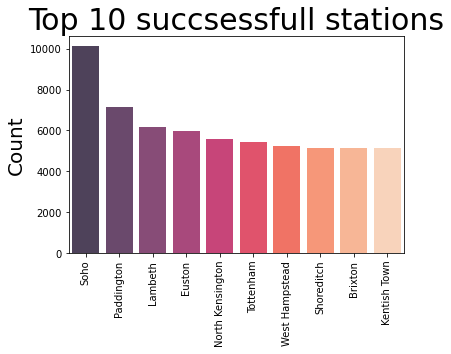

In [76]:
pump_count = data_uk['FirstPumpArriving_DeployedFromStation'].value_counts()
pump_count = pump_count[:10]
sns.barplot(x = pump_count.index, y = pump_count.values,alpha=0.8,saturation = 1, palette = 'rocket')
plt.title('Top 10 succsessfull stations', fontsize = 30)
#plt.xlabel('Incident Type', fontsize = 20)
plt.xticks(rotation = 90)
plt.ylabel('Count', fontsize = 20)
plt.show()

#In this graph you can see the 10 stations that arrive first for the event.

##### Succsessfull stations = the first station that arrived in the firecase, accorrding to there size, and distance from the case.

<img src= "https://raw.githubusercontent.com/Nogatiya/Data-Science/main/rod-vitalis.jpg" width="300"/>

#### Rodney Vitalis:

1. The commander of westminster borough (wich includes soho station)

> https://www.hackneygazette.co.uk/news/borough-fire-chief-rodney-vitalis-on-growing-up-in-hackney-3580932

2. His profiles on social media:

> twiter: https://twitter.com/RodneyV66

> facebook: https://www.facebook.com/rodney.vitalis



## Conclusion number 1:
After a long research on the Soho station, we found that they arrived first in many of the cases due to their correct use of human resources, extra trainig for the staff. And an experienced station manager (Rodney Vitalis) who demanded a bigger budget, and used it wisely. In addition, the manager made a point to mantain the personal equipment and the pumps in the highest standard, which improved the performances of the station.  

## exp. number 2:
We used the longtitude and latitude to create a map where the fires happened, and compared this to a map of population density. Based on this data, we could know what will be a better place to build a new fire station when our resources are limited.

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

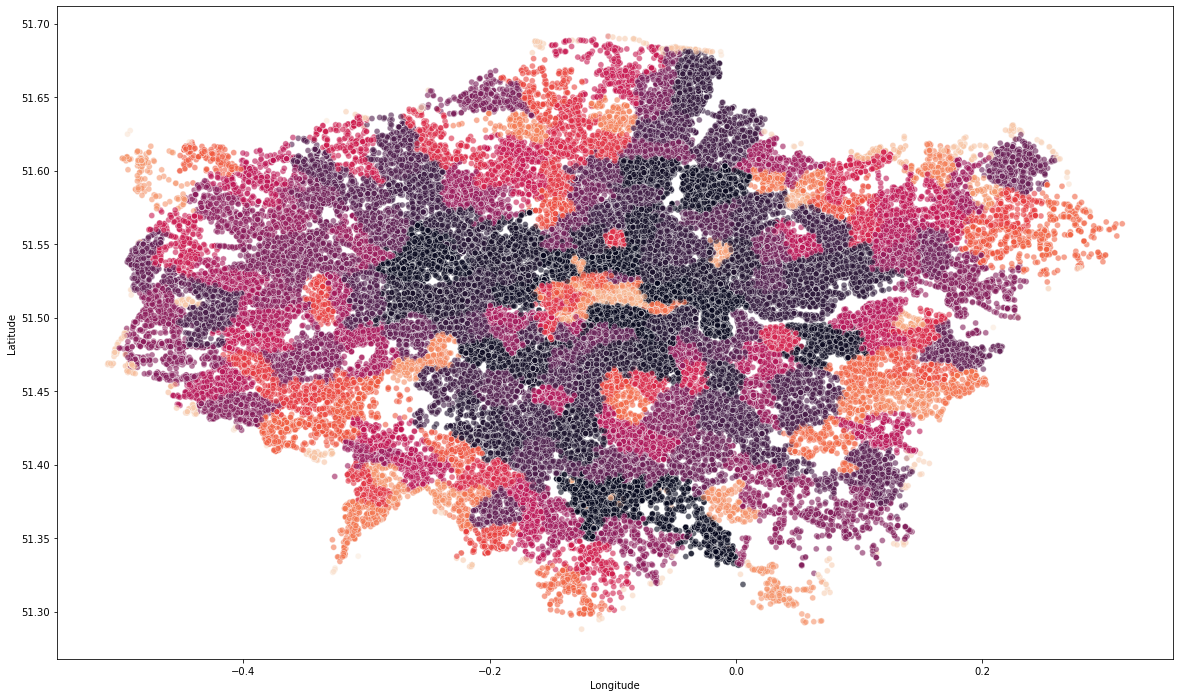

In [100]:
plt.figure(figsize = (20, 12))
data_uk1 = data_uk[data_uk["Latitude"] > 0]
sns.scatterplot(x = "Longitude", y = "Latitude", data = data_uk1, hue = "Postcode_district", 
                alpha = 0.6 ,legend = False, palette = "rocket", 
                hue_order = data_uk["Postcode_district"].value_counts().index)
#The darkest areas are areas with the biggest amount of fires

[ 4.63769717  2.51926909  7.20319807 ...  1.99557651  8.96463296
 34.32033118]


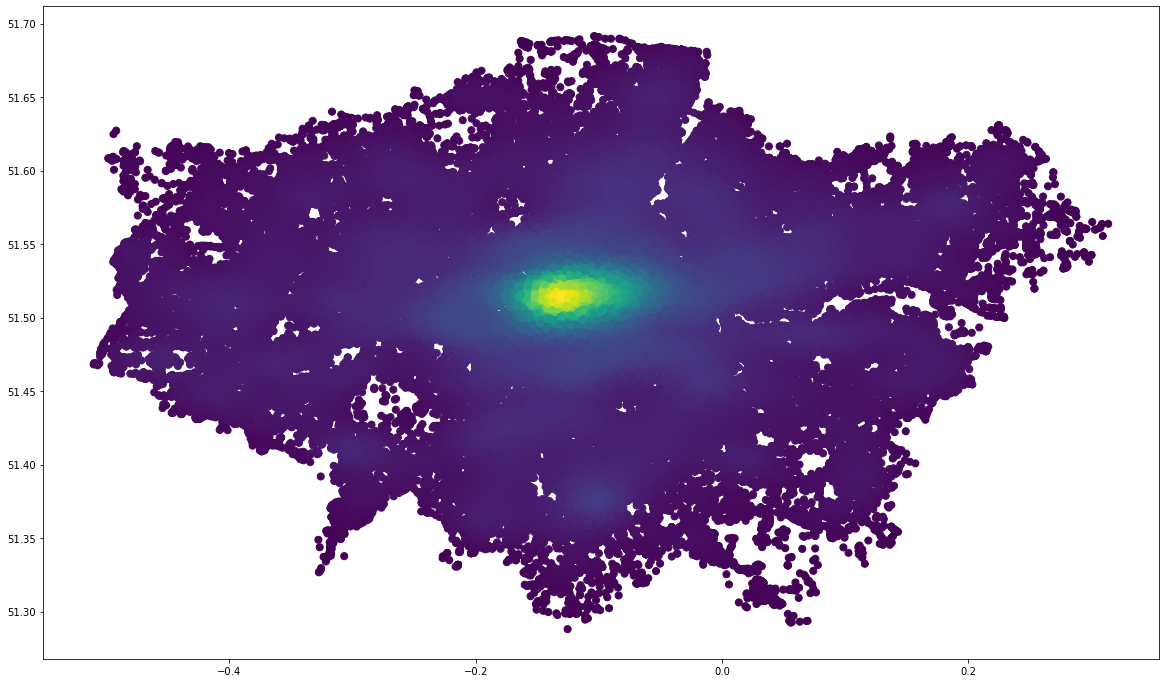

In [101]:
from scipy.stats import gaussian_kde
plt.figure(figsize = (20, 12))
x = data_uk1["Longitude"]
y = data_uk1["Latitude"]
xy = np.vstack([x,y])

z = gaussian_kde(xy)(xy)
print(z)

plt.scatter(x = "Longitude", y = "Latitude", data = data_uk1, c = z, s = 50)
# The lighter the color, the denser the area

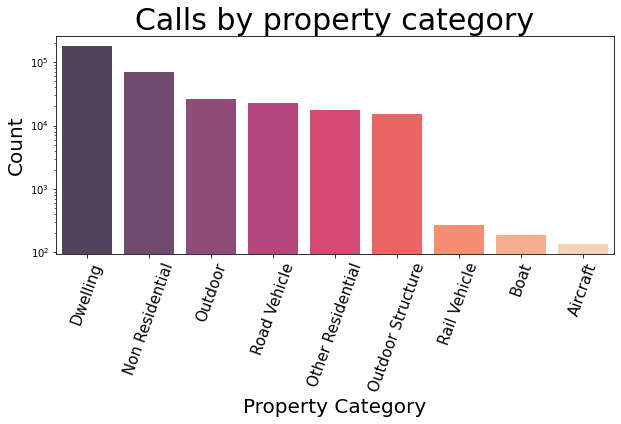

In [79]:
plt.figure(figsize=(10,4)) 
reason_count = data_uk['PropertyCategory'].value_counts()
reason_count = reason_count[:10]
sns.barplot(x = reason_count.index, y = reason_count.values,alpha=0.8,saturation = 1, palette = 'rocket', log='True')
plt.title('Calls by property category', fontsize = 30)
plt.xlabel('Property Category', fontsize = 20)
plt.xticks(rotation=70, fontsize = 15)
plt.ylabel('Count', fontsize = 20)
plt.show()
#show the proprty type that had fired

## Conclusion number 2: 
The comparison shows that although we might have thought of setting up fire stations near forested areas, we found that it was precisely the crowded places that had the most fires and should be prepared accordingly.

## Deeper analysis

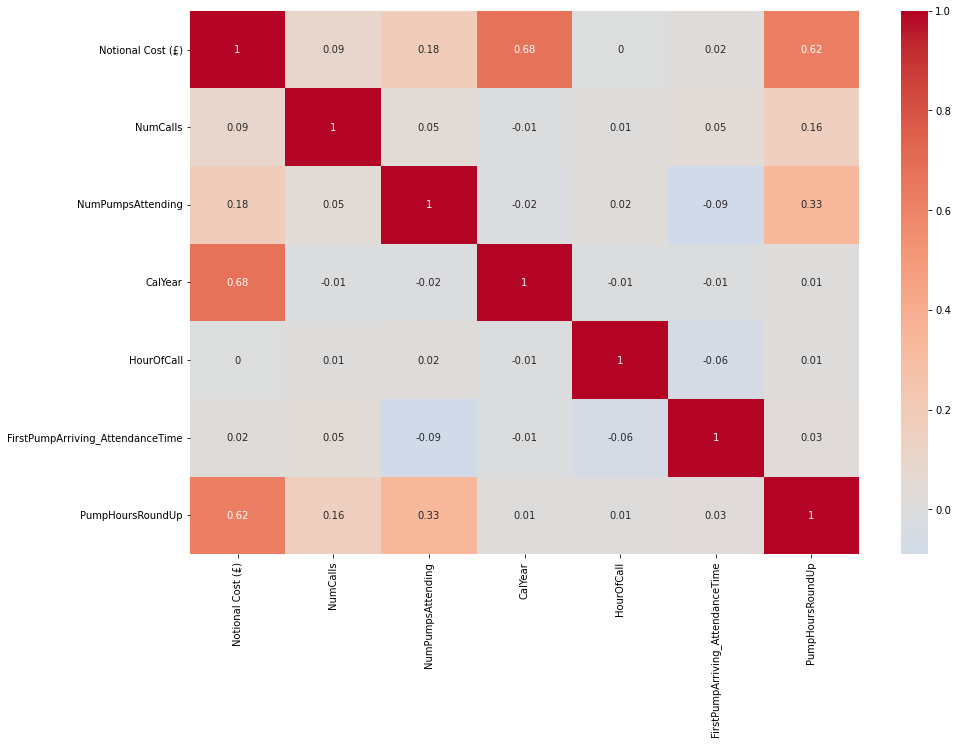

In [80]:
data_uk2 =data_uk[["Notional Cost (ֲ£)" , "NumCalls" , "NumPumpsAttending" ,"CalYear" , "HourOfCall" 
                   , "FirstPumpArriving_AttendanceTime" , "PumpHoursRoundUp"]]
corrs = data_uk2.corr(method = 'spearman').round(2)

plt.figure(figsize=(15,10))  #figure size
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);
#It can be seen that the two strongest correlations depend on the cost of dire demp. versus the number of calls per year / how many hours a pump worked

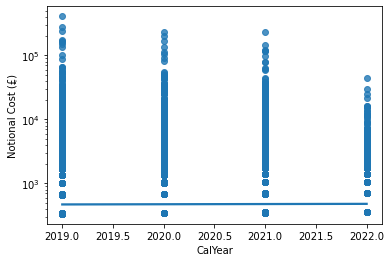

In [81]:
reg = sns.regplot(x = 'CalYear', y='Notional Cost (ֲ£)', data = data_uk2)
reg.set_yscale("log")

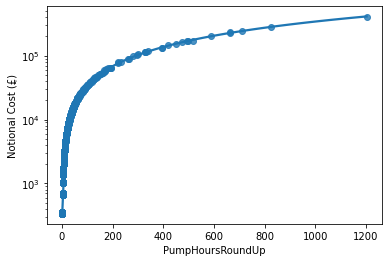

In [82]:
reg1 = sns.regplot(x = 'PumpHoursRoundUp', y='Notional Cost (ֲ£)', data = data_uk2)
reg1.set_yscale("log")

C:\Users\97252\.conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


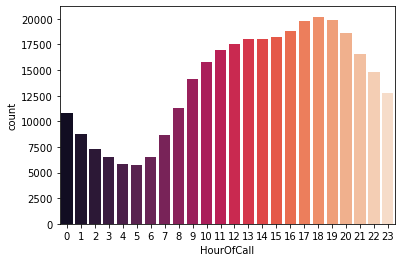

In [83]:
from datetime import date
sns.countplot(data_uk['HourOfCall'], saturation=0.9, palette="rocket");
#You can see in the graph the number of alarms at any hour of the day

<AxesSubplot:>

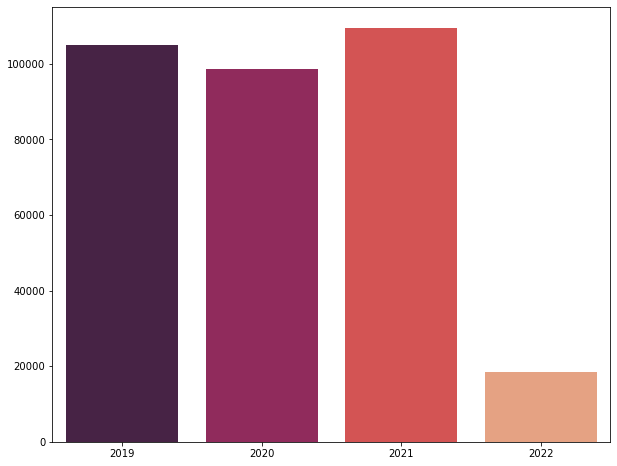

In [84]:
call_year = data_uk['CalYear'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=call_year.index ,y= call_year.values, data=data_uk, palette="rocket")
#You can see in the graph the number of alarms each year

<img src= "https://raw.githubusercontent.com/Nogatiya/Data-Science/main/%D7%AA%D7%9E%D7%95%D7%A0%D7%94%20%D7%90%D7%A9.jpg" width="400"/>

## Exp. number 3:
This part of the data analisys will be focused on the financial aspect of the fire dept. services. In order to determin whether a quality service can be provided without wasting unnecessary money.


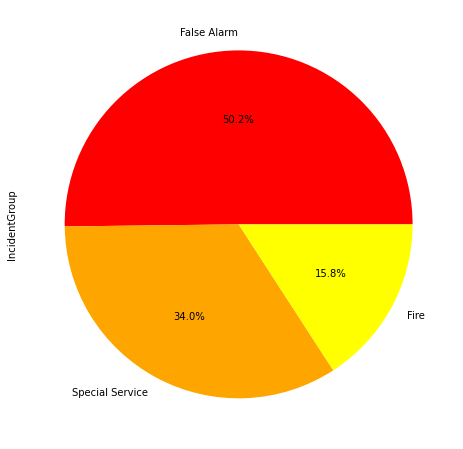

In [85]:
plt.figure(1, figsize=(15,8))
incident_count = data_uk['IncidentGroup'].value_counts().plot.pie(autopct="%1.1f%%", colors = ["red", "orange", "yellow"])
#show that more than 50 precennt of the calls are false alarms.

#### Look!!! More than half of the calls are false alarm!!! Let's see how much it costs us:

In [86]:
total_cost = data_uk.groupby(['IncidentGroup'])[['Notional Cost (ֲ£)']].sum().reset_index().copy()
total_cost
#show the cost of calls, according to incident group 

,IncidentGroup,Notional Cost (ֲ£)
0,False Alarm,62835572.0
1,Fire,43995896.0
2,Special Service,48629074.0


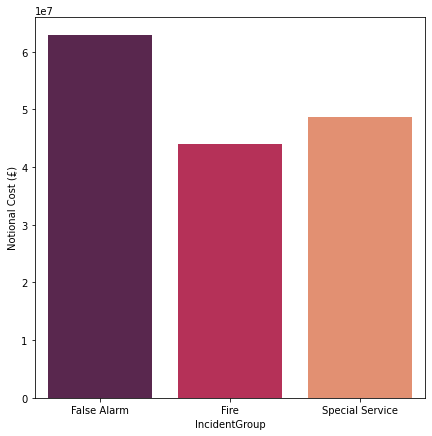

In [87]:
plt.figure(figsize=(7,7))
sns.barplot(x='IncidentGroup', y='Notional Cost (ֲ£)', data = total_cost, palette = 'rocket');
#The graph shows the total costs of each type of calls.
#It can be seen that the costs of false alarms are the highest.

In [88]:
final_cost = data_uk.groupby(['IncidentGroup','StopCodeDescription',])[['Notional Cost (ֲ£)']].sum().reset_index().copy()
final_cost

#You can see the amount of costs for each subtype of call type.

,IncidentGroup,StopCodeDescription,Notional Cost (ֲ£)
0,False Alarm,AFA,47623287.0
1,False Alarm,False alarm - Good intent,13973637.0
2,False Alarm,False alarm - Malicious,1238648.0
3,Fire,Chimney Fire,54507.0
4,Fire,Late Call,10746.0
5,Fire,Primary Fire,34563803.0
6,Fire,Secondary Fire,9366840.0
7,Special Service,Flood call attended - Batch mobilised,2017577.0
8,Special Service,Special Service,46611145.0
9,Special Service,Use of Special Operations Room,352.0


In [89]:
false_cost = final_cost.iloc[[0,1,2]].copy()
false_cost
#You can see the amount of costs for each sub-type of false alarms.

,IncidentGroup,StopCodeDescription,Notional Cost (ֲ£)
0,False Alarm,AFA,47623287.0
1,False Alarm,False alarm - Good intent,13973637.0
2,False Alarm,False alarm - Malicious,1238648.0


### Wow!!! That is a lot of money wasted in vain!! 

<img src= "https://raw.githubusercontent.com/Nogatiya/Data-Science/main/%D7%AA%D7%9E%D7%95%D7%A0%D7%94%20%D7%9B%D7%A1%D7%A3.jpg" width="400"/>


# Conclusion number 3:
After analising the financial aspects we have found that there are many state expences on false alarms. In order to reduce wasted expences, we suggest as follows:
1. Automatic alerts - improve information and technological equipment to avoid this big expense.
2. Good intention - a price we are willing to pay as a community for vigilance and social responsibility.
3. Malicious intent - to impose fines on people who harass the fire department and waste state money.

## Prediction:

We tried to predict whether a received call is a false alarm or not, considering the neighborhood from which the call was made, and the time of the call.

In [90]:
import numpy as np

In [91]:
data_uk['isFalseAlarm'] = np.where(data_uk['IncidentGroup']== 'False Alarm', True, False)

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [93]:
X = pd.get_dummies(data_uk[['HourOfCall','ProperCase']])
y = data_uk[['isFalseAlarm']]

X.head()

,HourOfCall,ProperCase_Barking And dagenham,ProperCase_Barnet,ProperCase_Bexley,ProperCase_Brent,ProperCase_Bromley,ProperCase_Camden,ProperCase_City Of london,ProperCase_Croydon,ProperCase_Ealing,...,ProperCase_Merton,ProperCase_Newham,ProperCase_Redbridge,ProperCase_Richmond Upon thames,ProperCase_Southwark,ProperCase_Sutton,ProperCase_Tower Hamlets,ProperCase_Waltham Forest,ProperCase_Wandsworth,ProperCase_Westminster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42) 
y_test.head()

,isFalseAlarm
142918,True
237229,True
91869,False
179027,True
82215,True


In [95]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [96]:
def eval(x_test,y_test,model):
    pred = model.predict(x_test)
    print("MSE: {:.3f}".format(mean_squared_error(pred,y_test,squared=False)))

In [97]:
eval(X_test,y_test,model)

MSE: 0.492


In [98]:
import sklearn.tree as tree
def plot_tree(tree_model,feat,size=(15,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat, 
                   filled=True,
                  fontsize=15)  
    plt.show()

MSE: 0.495


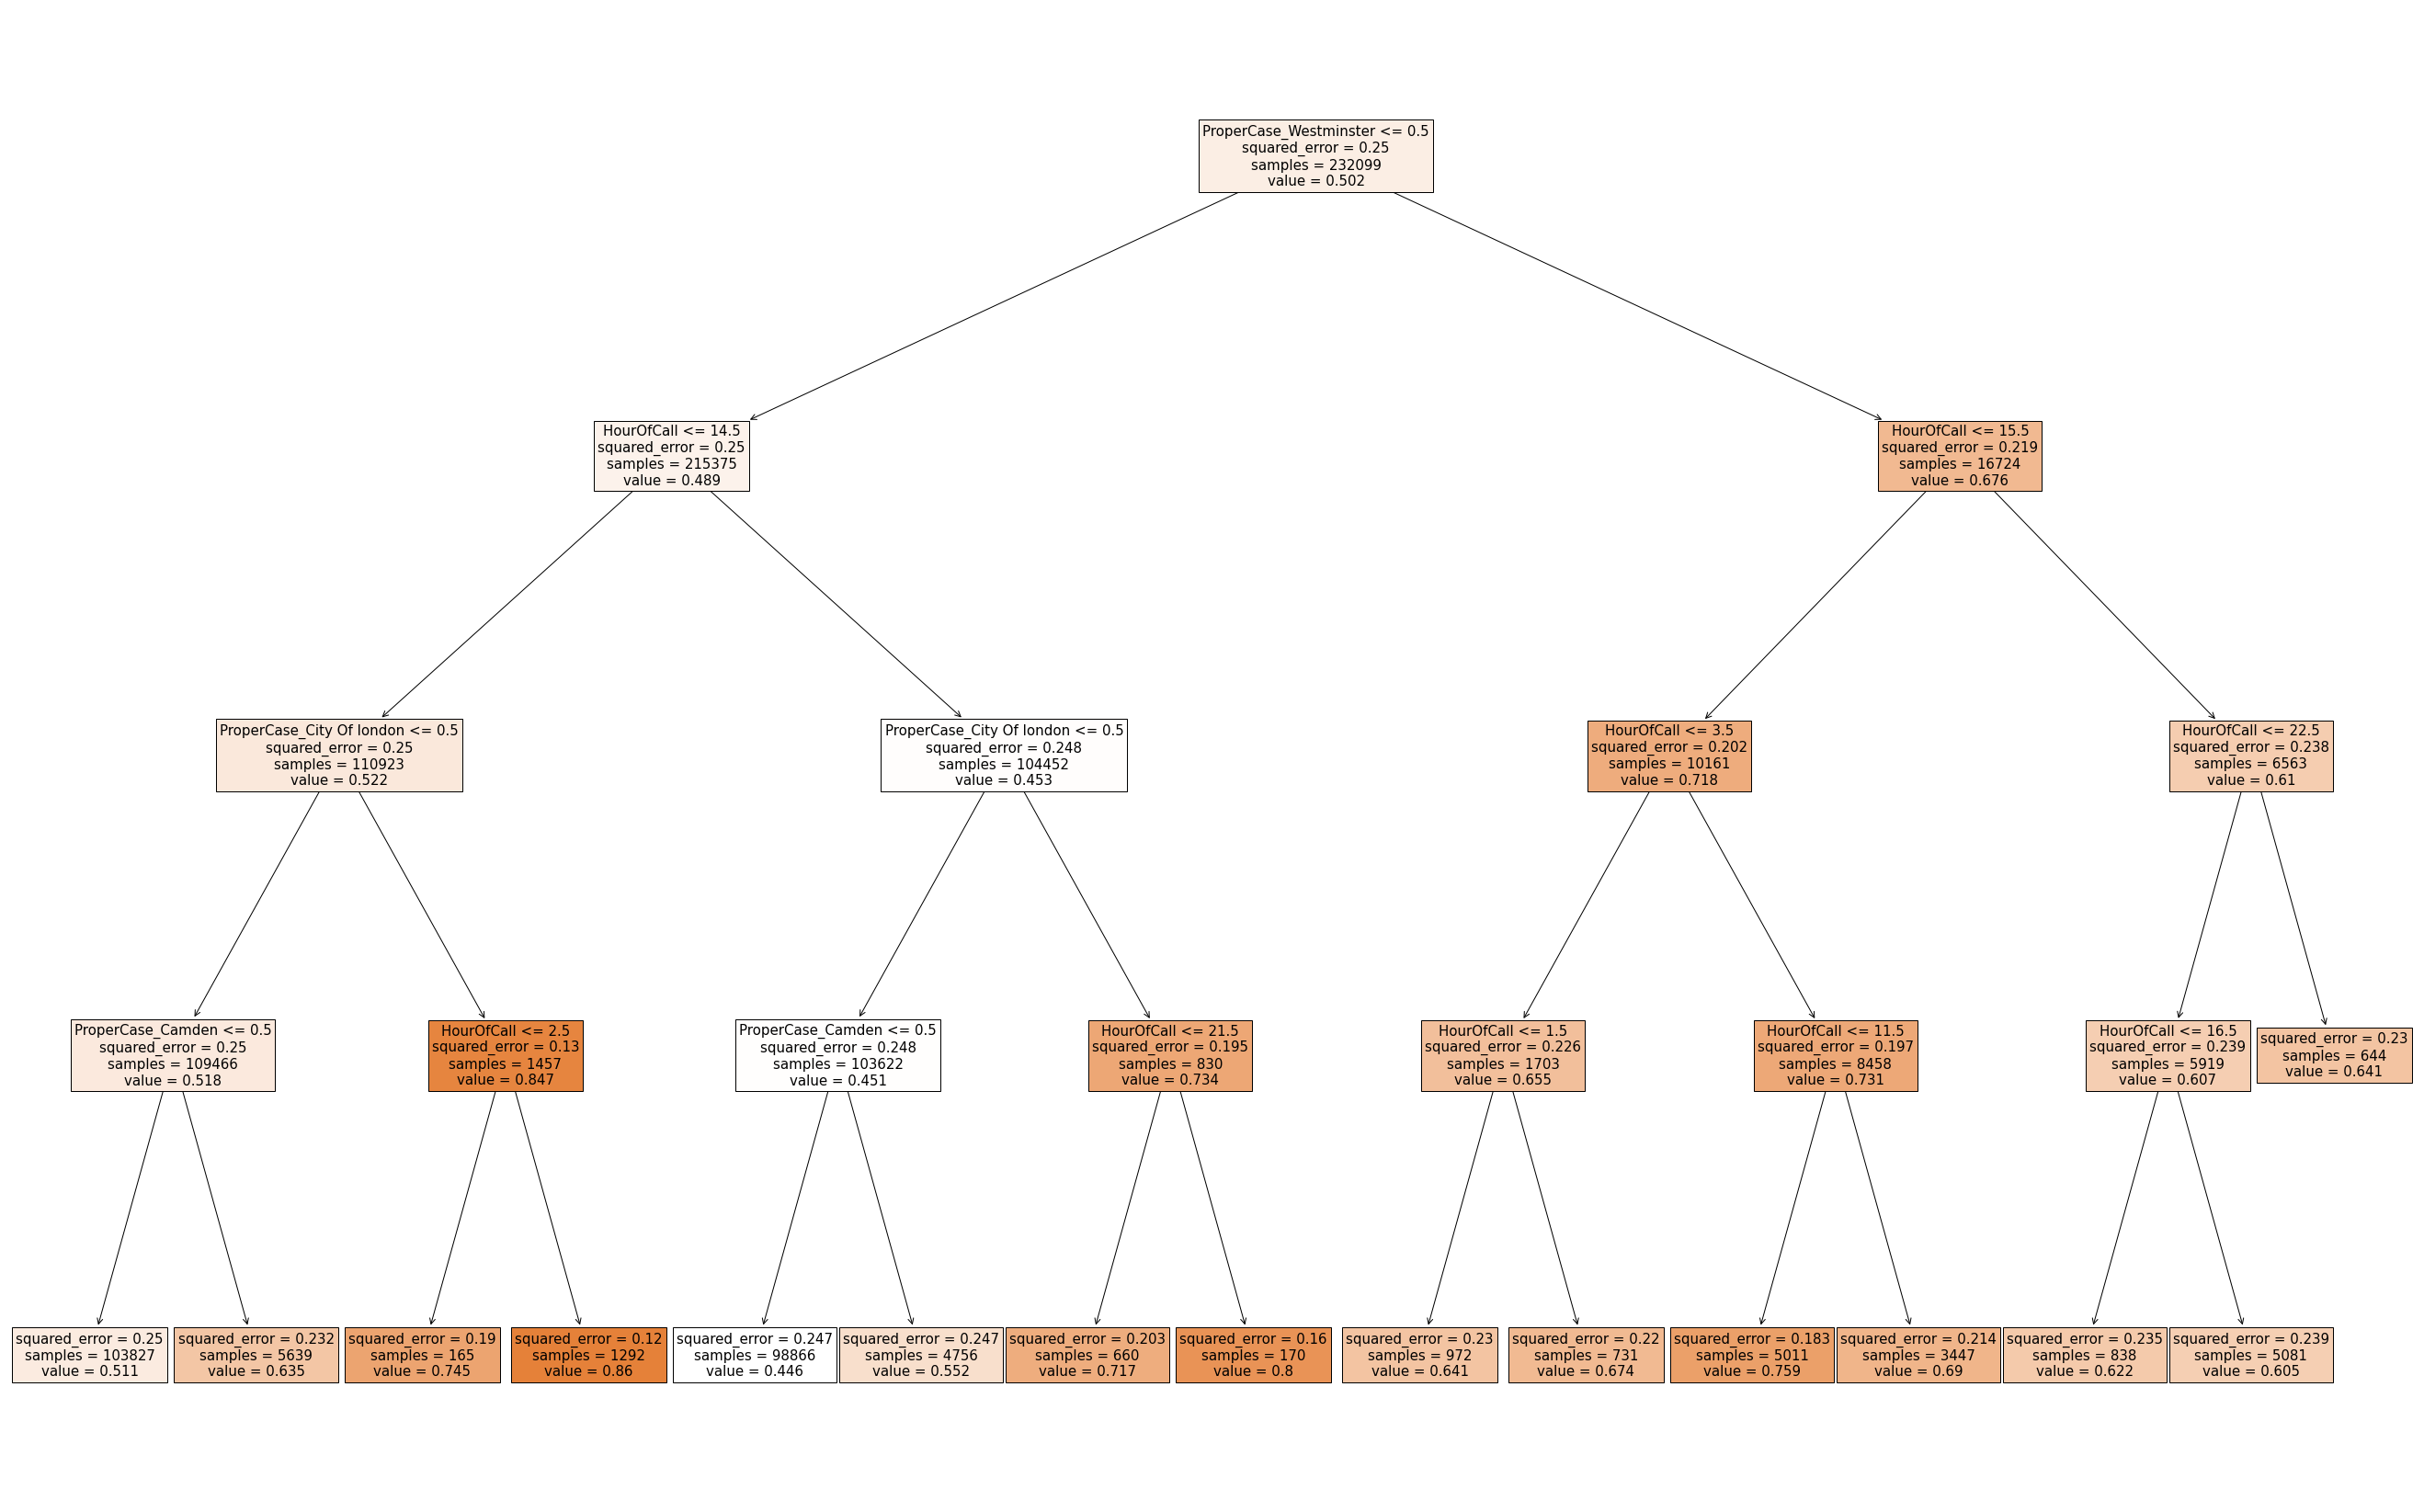

In [99]:
model = DecisionTreeRegressor(max_depth=4,random_state=42)
model.fit(X_train,y_train)

eval(X_test,y_test,model)
plot_tree(model,X_test.columns,size=(47,30))

"When the situation is under pressure, efficiency is everything" - (Margaret Thatcher)

This data is valuable because in cases of multiple events simultaneously, it can help decide which call to prioritize and address first.

<img src= "https://raw.githubusercontent.com/Nogatiya/Data-Science/main/%D7%AA%D7%9E%D7%95%D7%A0%D7%94%20%D7%9C%D7%A1%D7%95%D7%A3%20%D7%94%D7%A4%D7%A8%D7%95%D7%99%D7%A7%D7%98.jpg" width="400"/>

### do good, and thanks for your time!!